# **Importing the requied libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# **Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df= pd.read_csv('/content/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df=df.drop_duplicates()
df.shape

(1337, 7)

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# **Data Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

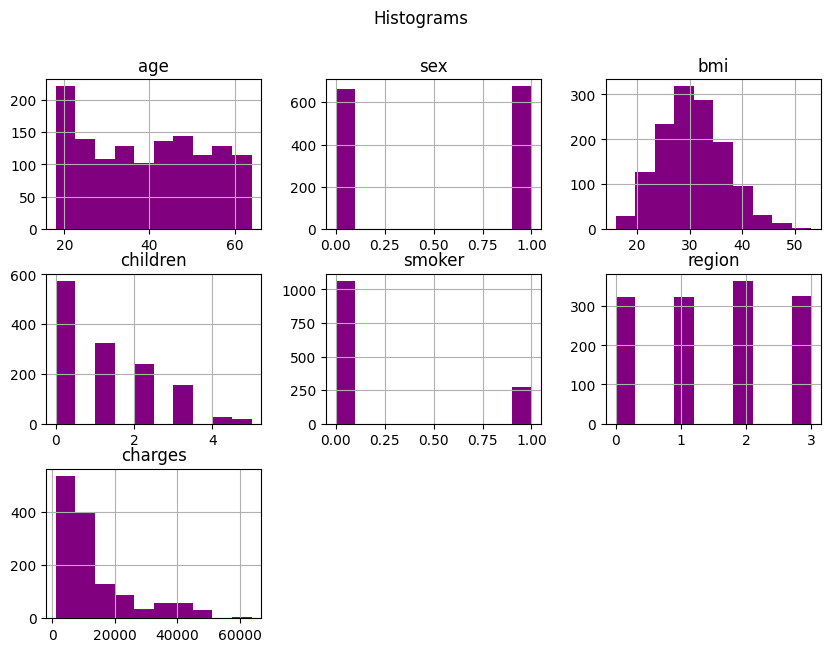

In [ ]:
df.hist(figsize=(10,7), color ="purple")
plt.suptitle("Histograms")
plt.show

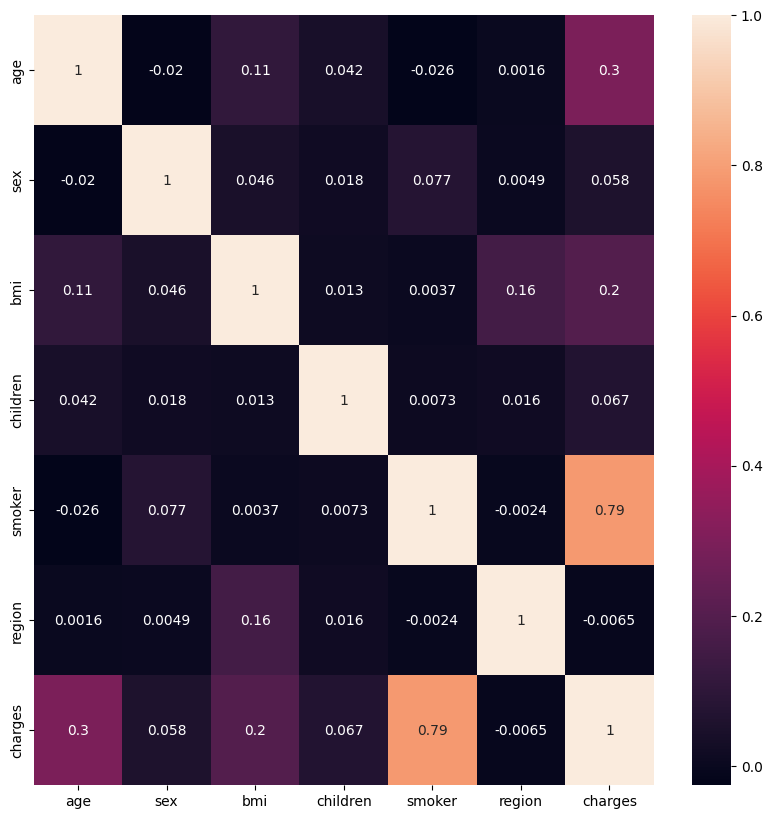

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 7
Discrete feature Count 4
Continuous feature Count 3
Categorical feature Count 0


In [ ]:
print("Numerical features:",numerical_feature)

print("discrete_features:",discrete_feature)

print("continuous_features:",continuous_feature)

print("categorical_features:",categorical_feature)

Numerical features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
discrete_features: ['sex', 'children', 'smoker', 'region']
continuous_features: ['age', 'bmi', 'charges']
categorical_features: []


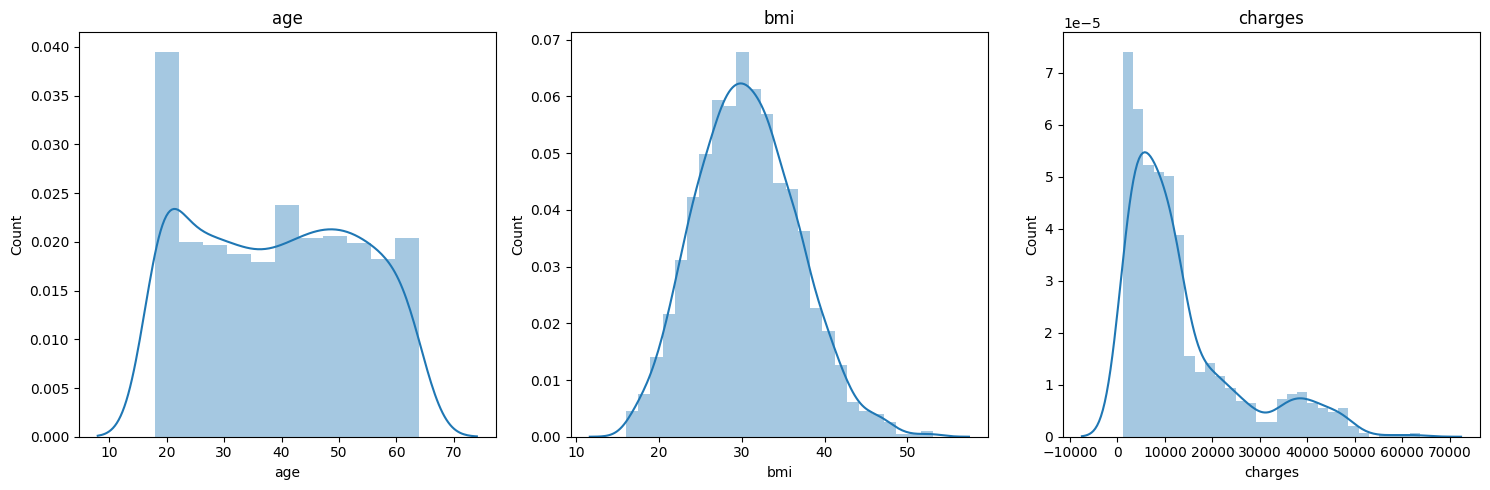

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = 3
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))  # Adjusted figsize

# Assuming continuous_feature is a list of features you want to plot
for i, feature in enumerate(continuous_feature):
    sns.distplot(df[feature], ax=axes[i])  # Use ax parameter to specify the subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].set_title(feature)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


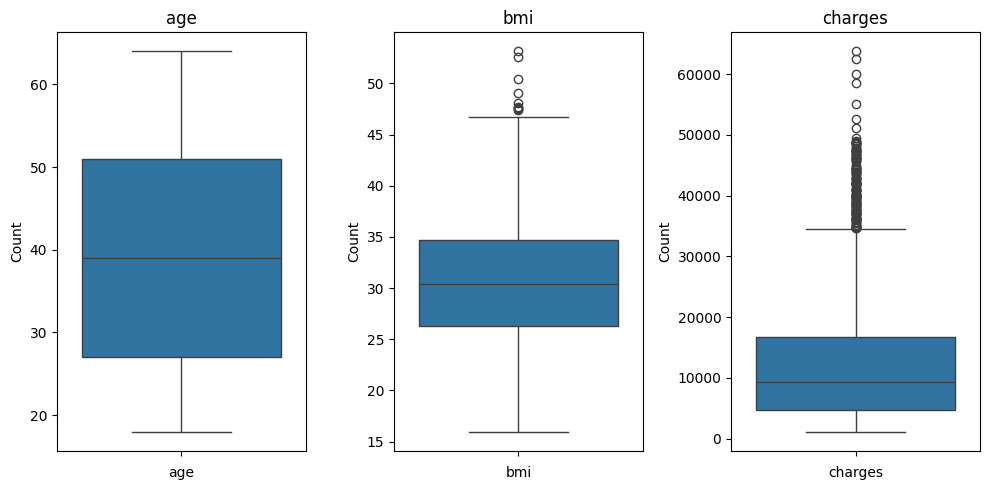

In [ ]:


num_plots = 3
fig, axes = plt.subplots(1, num_plots, figsize=(10, 5))  # Adjusted figsize

# Assuming continuous_feature is a list of features you want to plot
for i, feature in enumerate(continuous_feature):
    sns.boxplot(df[feature], ax=axes[i])  # Use ax parameter to specify the subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].set_title(feature)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

age
bmi
charges


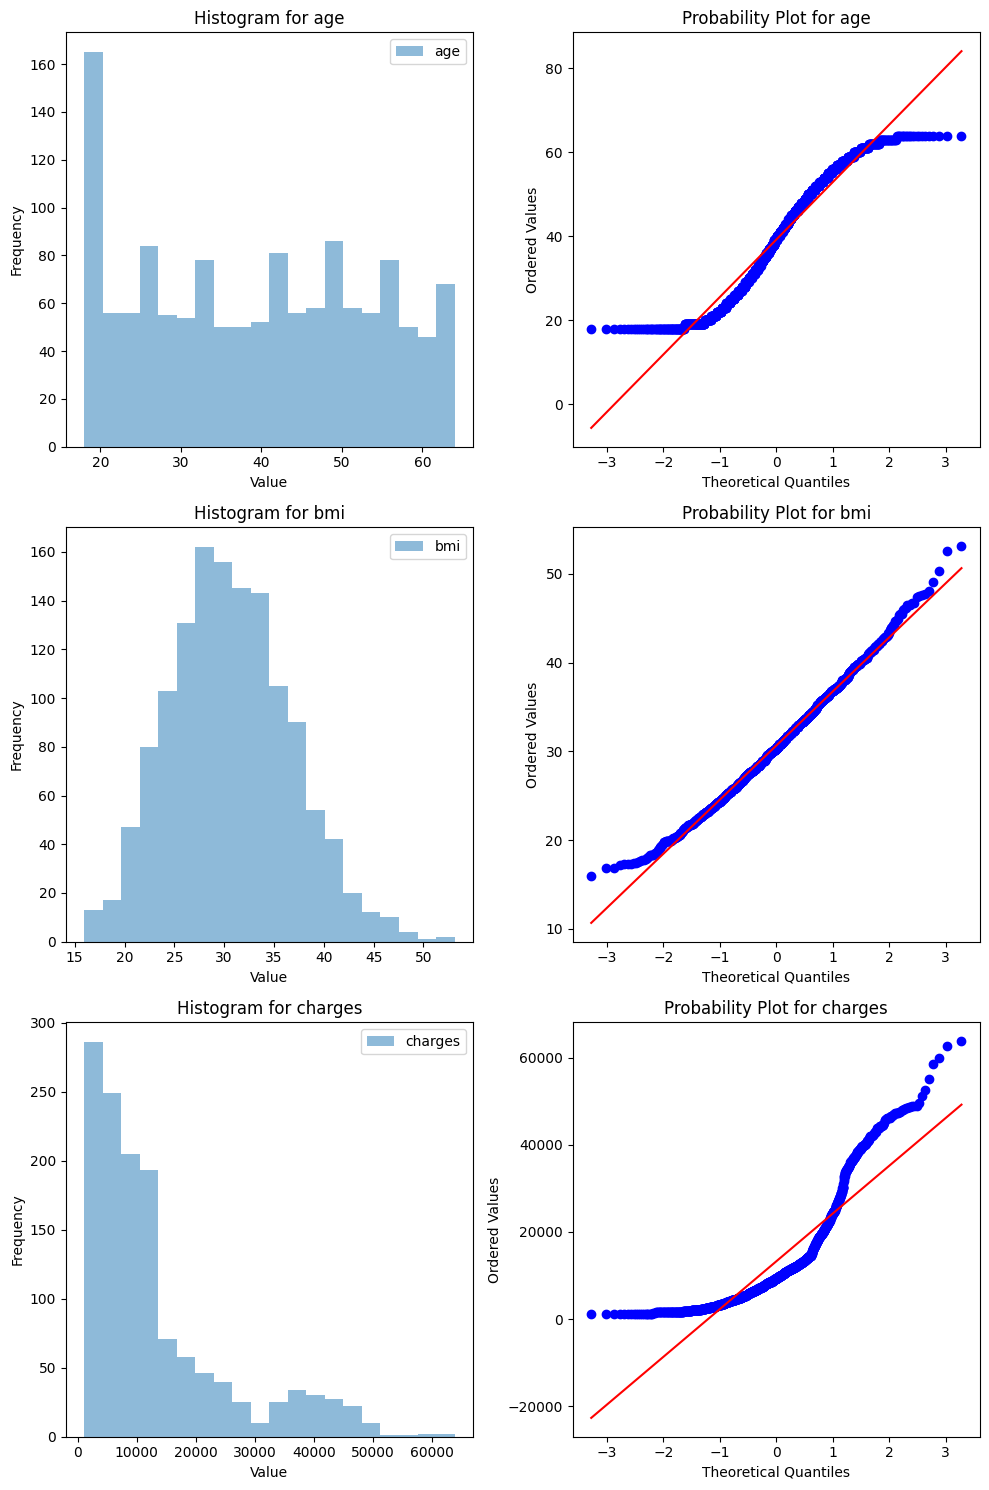

In [ ]:
import scipy.stats as stats

num_plots = 3
fig, axes = plt.subplots(num_plots, 2, figsize=(10, 5*num_plots))

for i, feature in enumerate(continuous_feature):
    print(feature)
    axes[i, 0].hist(df[feature], bins=20, alpha=0.5, label=feature)
    stats.probplot(df[feature], dist="norm", plot=axes[i, 1])

    axes[i, 0].set_title(f'Histogram for {feature}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    axes[i, 1].set_title(f'Probability Plot for {feature}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# **Data Splitting**

In [ ]:
#import normalizer from preprocessing package of sklearn
from sklearn.preprocessing import Normalizer
#create an instance of the object(i.e., a model estimator)
normalize = Normalizer()
ni_df = normalize.transform(df)
#view the new normalized data
ni_df

array([[1.12526190e-03, 0.00000000e+00, 1.65235827e-03, ...,
        5.92243106e-05, 1.77672932e-04, 9.99997984e-01],
       [1.04288680e-02, 5.79381554e-04, 1.95657151e-02, ...,
        0.00000000e+00, 1.15876311e-03, 9.99753173e-01],
       [6.29259576e-03, 2.24735563e-04, 7.41627357e-03, ...,
        0.00000000e+00, 4.49471125e-04, 9.99952346e-01],
       ...,
       [1.10405699e-02, 0.00000000e+00, 2.26025000e-02, ...,
        0.00000000e+00, 1.22672999e-03, 9.99682814e-01],
       [1.04570071e-02, 0.00000000e+00, 1.28471802e-02, ...,
        0.00000000e+00, 1.49385816e-03, 9.99861675e-01],
       [2.09323914e-03, 0.00000000e+00, 9.97548554e-04, ...,
        3.43153957e-05, 3.43153957e-05, 9.99997310e-01]])

In [ ]:
df = pd.DataFrame(ni_df, columns= ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.001125,0.000000,0.001652,0.000000,0.000059,0.000178,0.999998
1,0.010429,0.000579,0.019566,0.000579,0.000000,0.001159,0.999753
2,0.006293,0.000225,0.007416,0.000674,0.000000,0.000449,0.999952
3,0.001501,0.000045,0.001033,0.000000,0.000000,0.000045,0.999998
4,0.008275,0.000259,0.007468,0.000000,0.000000,0.000259,0.999938


In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
X.shape

(1337, 6)

In [ ]:
y.shape

(1337,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

# **Model Evaluation**

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create and fit Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_1 = lr_model.predict(X_test)

# Compute the R-squared score
r2 = r2_score(y_test, y_pred_1)
mse = mean_squared_error(y_test, y_pred_1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_1)

# Print the results
print("R-squared score: {}".format(r2))
print("Mean squared error: {}".format(mse))
print("Root mean squared error: {}".format(rmse))
print("Mean absolute error: {}".format(mae))

R-squared score: 0.9191619767884954
Mean squared error: 3.163956906523535e-10
Root mean squared error: 1.7787515021844773e-05
Mean absolute error: 1.3471791816749374e-05


Lasso

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso object with a regularization parameter of 0.1
lasso_reg = Lasso(alpha=0.1)

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_3 = lasso_reg.predict(X_test)

# Calculate the R-squared score on the test data
r2_score_3 = r2_score(y_test, y_pred_3)

# Calculate the mean squared error on the test data
mse_3 = mean_squared_error(y_test, y_pred_3)

# Calculate the root mean squared error on the test data
rmse_3 = np.sqrt(mse_3)

# Calculate the mean absolute error on the test data
mae_3 = mean_absolute_error(y_test, y_pred_3)

print("R-squared (R2) score:", r2_score_3)
print("Mean Squared Error (MSE):", mse_3)
print("Root Mean Squared Error (RMSE):", rmse_3)
print("Mean Absolute Error (MAE):", mae_3)

R-squared (R2) score: -0.02298908681396994
Mean Squared Error (MSE): 4.003924462693479e-09
Root Mean Squared Error (RMSE): 6.327657119893175e-05
Mean Absolute Error (MAE): 4.250842534393335e-05


Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# create the Ridge regression model
model_4 = Ridge()

# fit the model on the training data
model_4.fit(X_train, y_train)

# make predictions on the test data
y_pred_4 = model_4.predict(X_test)

# calculate evaluation metrics
r2_4 = r2_score(y_test, y_pred_4)
mse_4 = mean_squared_error(y_test, y_pred_4)
rmse_4 = np.sqrt(mse)
mae_4 = mean_absolute_error(y_test, y_pred_4)

# print the evaluation metrics
print("R-squared (R2) score:", r2_4)
print("Mean Squared Error (MSE):", mse_4)
print("Root Mean Squared Error (RMSE):", rmse_4)
print("Mean Absolute Error (MAE):", mae_4)


R-squared (R2) score: 0.05621417276463192
Mean Squared Error (MSE): 3.693927149291548e-09
Root Mean Squared Error (RMSE): 2.4961952489504244e-06
Mean Absolute Error (MAE): 4.053134633749205e-05


KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create KNN regressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_5 = knn.predict(X_test)

r2_5 = r2_score(y_test, y_pred_5)
mse_5 = mean_squared_error(y_test, y_pred_5)
rmse_5 = np.sqrt(mse_5)
mae_5 = mean_absolute_error(y_test, y_pred_5)

# print the evaluation metrics
print("R-squared (R2) score:", r2_5)
print("Mean Squared Error (MSE):", mse_5)
print("Root Mean Squared Error (RMSE):", rmse_5)
print("Mean Absolute Error (MAE):", mae_5)


R-squared (R2) score: 0.9982559913759075
Mean Squared Error (MSE): 6.825956291381689e-12
Root Mean Squared Error (RMSE): 2.6126531134809475e-06
Mean Absolute Error (MAE): 9.121071827331805e-07


RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred_6 = rf.predict(X_test)

# Evaluate the model performance
r2_6 = r2_score(y_test, y_pred_6)
mse_6 = mean_squared_error(y_test, y_pred_6)
rmse_6 = mean_squared_error(y_test, y_pred_6, squared=False)
mae_6 = mean_absolute_error(y_test, y_pred_6)

print("R-squared (R2) score: {}".format(r2_6))
print("Mean Squared Error (MSE):{}".format(mse_6))
print("Root Mean Squared Error (RMSE):{}".format(rmse_6))
print("Mean Absolute Error (MAE): {}".format(mae_6))


R-squared (R2) score: 0.9974442307301484
Mean Squared Error (MSE):1.0003143955747466e-11
Root Mean Squared Error (RMSE):3.1627747241540086e-06
Mean Absolute Error (MAE): 1.0703092065744712e-06


GradientBoostingRegressor

In [ ]:
# Using GradientBoostingRegressor Model
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor()
reg.fit(X_test , y_test)
# Make predictions on test data
y_pred_7 = reg.predict(X_test)

# Evaluate the model performance
r2_7 = r2_score(y_test, y_pred_7)
mse_7 = mean_squared_error(y_test, y_pred_7)
rmse_7 = mean_squared_error(y_test, y_pred_7, squared=False)
mae_7 = mean_absolute_error(y_test, y_pred_7)

print("R-squared (R2) score: {}".format(r2_7))
print("Mean Squared Error (MSE):{}".format(mse_7))
print("Root Mean Squared Error (RMSE):{}".format(rmse_7))
print("Mean Absolute Error (MAE): {}".format(mae_7))


R-squared (R2) score: 0.9999288367862236
Mean Squared Error (MSE):2.7852900500694626e-13
Root Mean Squared Error (RMSE):5.277584722265918e-07
Mean Absolute Error (MAE): 3.662853978559971e-07


## Model Comparison

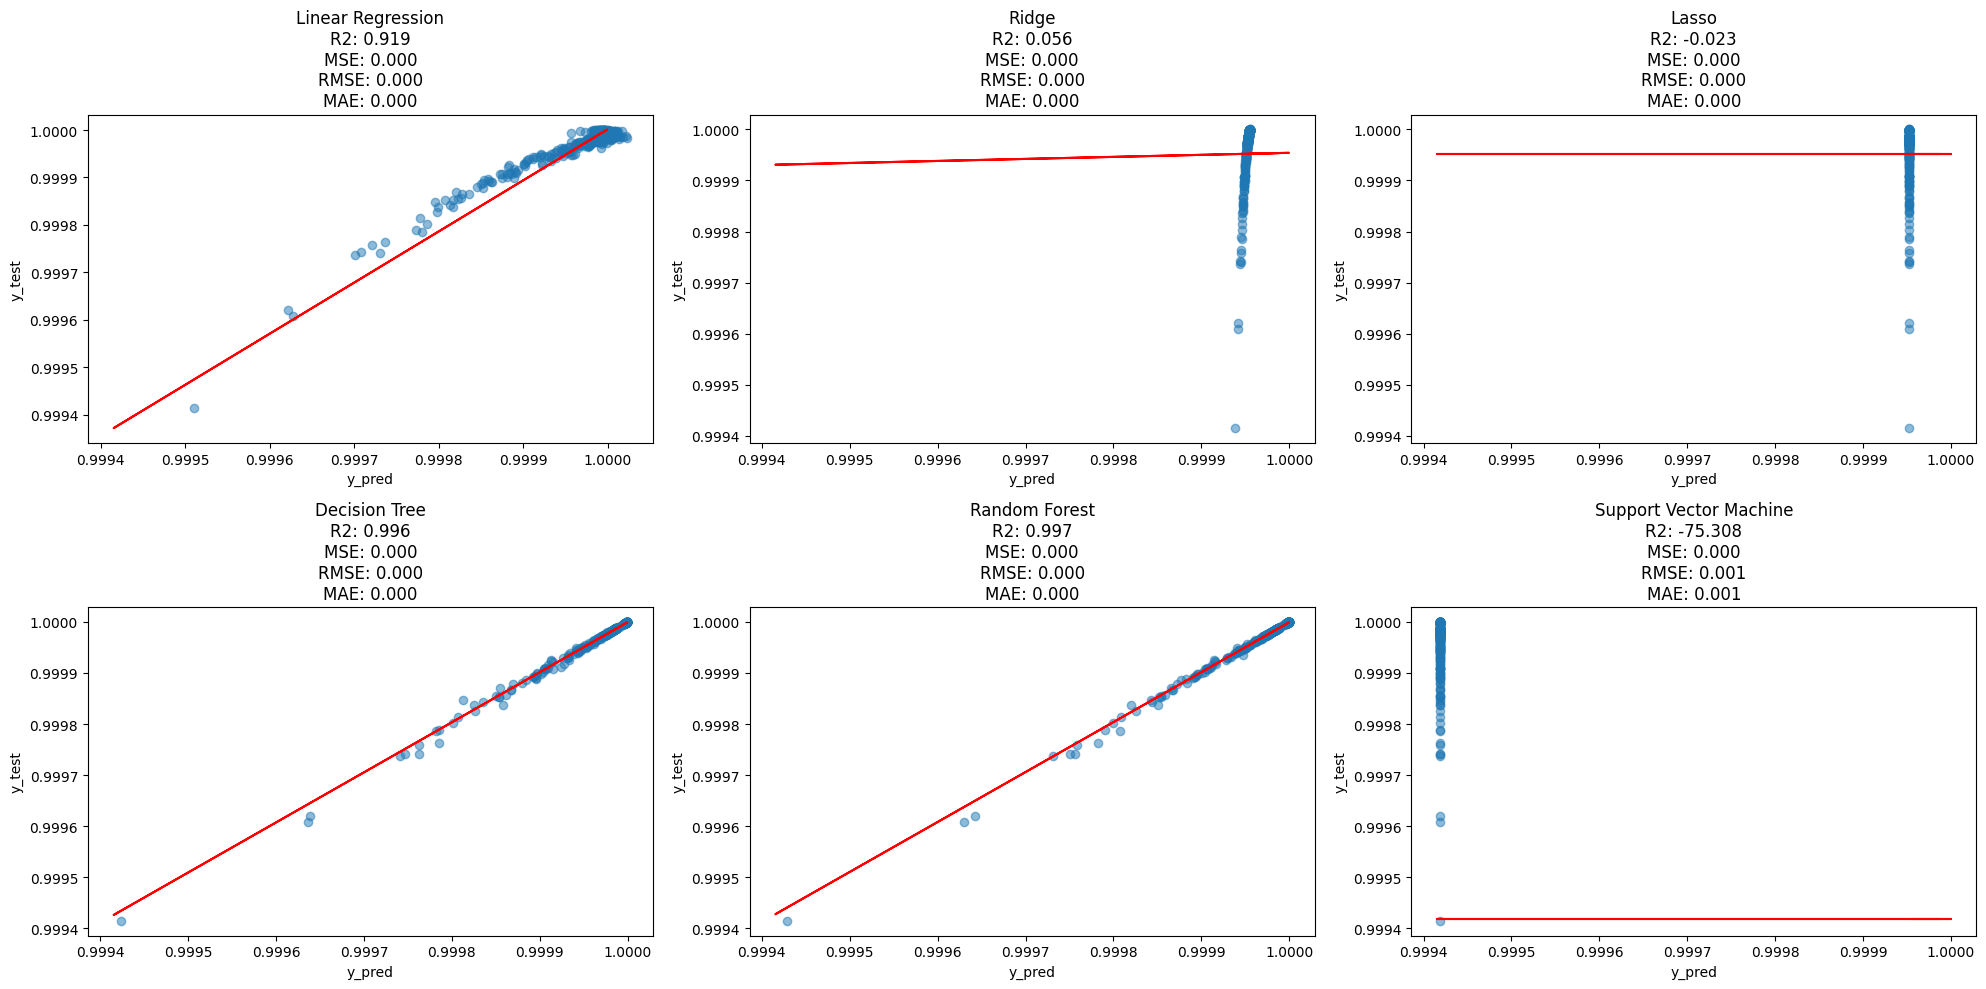

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Iterate over models and subplot positions
for i, (model_name, model) in enumerate(models.items()):
    row = i // 3  # Corrected to 3 columns
    col = i % 3

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Plotting
    axes[row, col].scatter(y_pred, y_test, alpha=0.5)
    a, b = np.polyfit(y_test, y_pred, 1)
    axes[row, col].plot(y_test, a*y_test + b, color='red')
    axes[row, col].set_title(f'{model_name}\nR2: {r2:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}')
    axes[row, col].set_xlabel('y_pred')
    axes[row, col].set_ylabel('y_test')

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Knn': KNeighborsRegressor(n_neighbors=10),
    'GradientBoost Regressor': GradientBoostingRegressor()
}

# Lists to store metrics
model_names = []
mse_values = []
rmse_values = []
mae_values = []
r2_values = []


# Iterate over models and subplot positions
for i, (model_name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics in lists
    model_names.append(model_name)
    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-squared': r2_values
})

# Display the DataFrame
print(df)



                     Model           MSE      RMSE           MAE  R-squared
0        Linear Regression  3.163957e-10  0.000018  1.347179e-05   0.919162
1                    Ridge  3.693927e-09  0.000061  4.053135e-05   0.056214
2                    Lasso  4.003924e-09  0.000063  4.250843e-05  -0.022989
3            Decision Tree  1.751569e-11  0.000004  1.636938e-06   0.995525
4            Random Forest  9.157619e-12  0.000003  1.055748e-06   0.997660
5   Support Vector Machine  2.986664e-07  0.000547  5.429317e-04 -75.308252
6                      Knn  8.679359e-12  0.000003  9.656038e-07   0.997782
7  GradientBoost Regressor  6.230798e-12  0.000002  1.130569e-06   0.998408


The higher the R-squared score, the better the model. Based on the R-squared scores, the GradientBoost Regressor, K-Nearest Neighbors (Knn) model, Random Forest, and Decision Tree seem to be performing well, with R-squared scores close to 1.

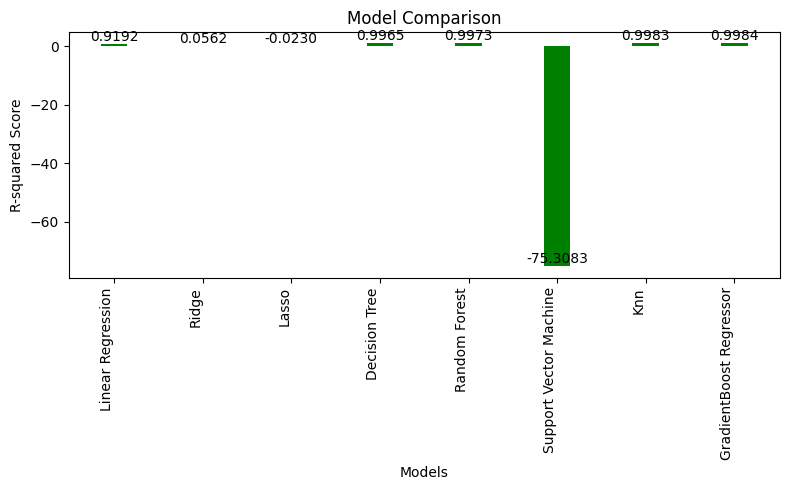

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Knn': KNeighborsRegressor(n_neighbors=5),
    'GradientBoost Regressor': GradientBoostingRegressor()
}

# Fit models and calculate R-squared scores
r2_scores = [r2_score(y_test, model.fit(X_train, y_train).predict(X_test)) for model in models.values()]

fig, ax = plt.subplots(figsize=(8, 5))
rects = ax.bar(models.keys(), r2_scores, color='g', width=0.3)

ax.set_xlabel('Models')
ax.set_ylabel('R-squared Score')
ax.set_title('Model Comparison')
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models.keys(), rotation=45, ha='right')

for rect, r2 in zip(rects, r2_scores):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{r2:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()